<a href="https://colab.research.google.com/github/vertesemash/CS2704-Final-Project-JG/blob/main/CS2704%20final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

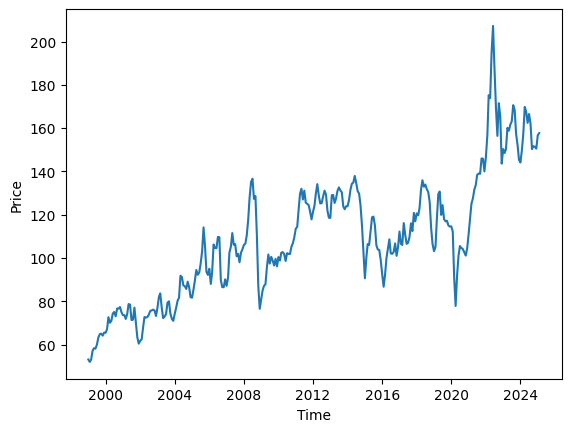

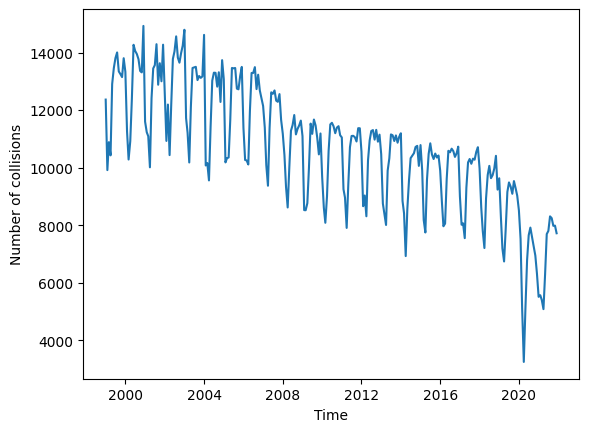

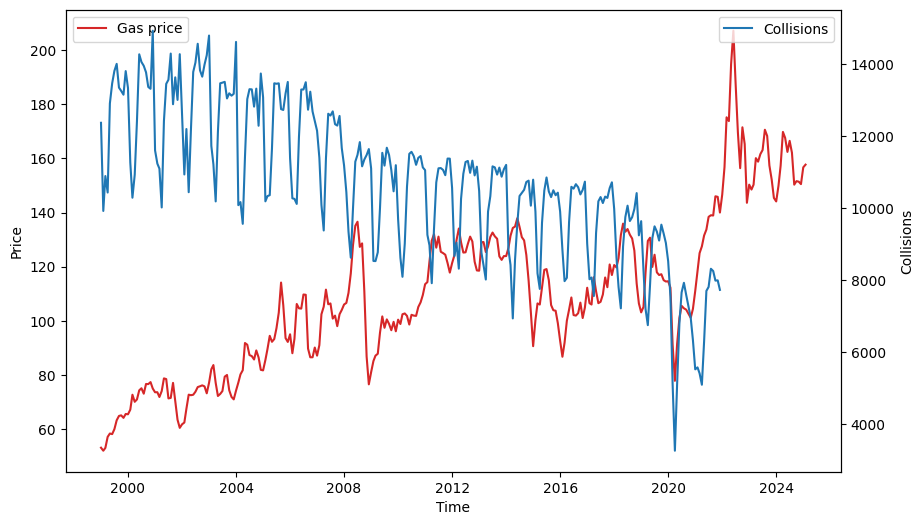

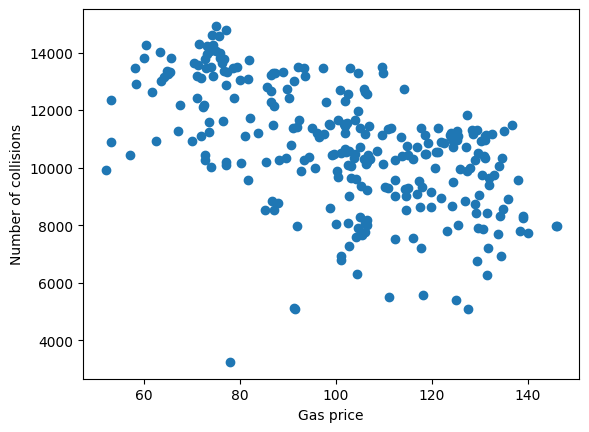

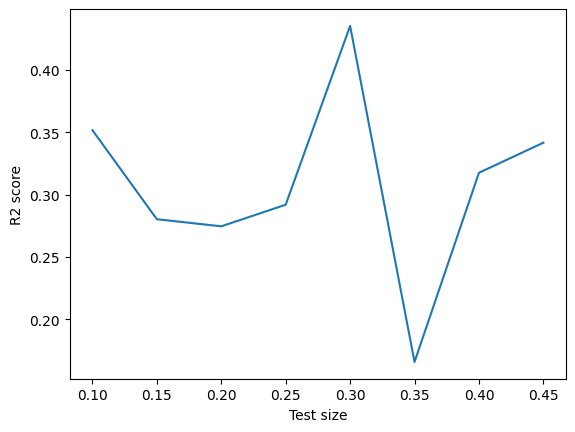

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Read in data

gasPriceFileName = "avg federal gas prices - cleaned.csv"
gasColumnNames = ['Time', 'Price']
gasData = pd.read_csv(gasPriceFileName, names=gasColumnNames)

collisionFileName = "Collision numbers by month cleaned.csv"
collisionColumnNames = ['Time','Value']
collisionData = pd.read_csv(collisionFileName, names=collisionColumnNames)

#print(gasData)

#print (collisionData)

#print(type(collisionData['Time']))

#Convert format of time fields
gasData['Time'] = pd.to_datetime(gasData['Time'], format='%b-%y')
collisionData['Time'] = pd.to_datetime(collisionData['Time'], format='%b-%y')


#Create lineplot for gas
sns.lineplot(x="Time", y="Price", data=gasData)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.show()

#Create lineplot for collisions
sns.lineplot(x="Time", y="Value", data=collisionData)
plt.ylabel("Number of collisions")
plt.show()


#Create lineplot for both variables
fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x="Time", y="Price", data=gasData, ax = ax1, color='tab:red', label='Gas price')

ax2 = ax1.twinx()

sns.lineplot(x="Time", y="Value", data=collisionData, ax=ax2, label='Collisions')

ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

ax2.set_ylabel('Collisions')

plt.show()

#Merge data and create scatter plot

mergedData = pd.merge(gasData, collisionData, on='Time', how='inner')

#print(mergedData)


X = mergedData['Price'].to_frame()
Y = mergedData['Value'].to_frame()

plt.scatter(X, Y)
plt.xlabel("Gas price")
plt.ylabel("Number of collisions")
plt.show()


#Initialize variables for linear regression
r2_results = [0]*8
accuracy_results = [0]*8
test_sizes = [0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

for i in range(8):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_sizes[i])

  model = LinearRegression()

  model.fit(X_train, Y_train)

  Y_pred = model.predict(X_test)

  r2_results[i] = r2_score(Y_test, Y_pred)

#print(r2_results)

plt.plot(test_sizes, r2_results)
plt.xlabel("Test size")
plt.ylabel("R2 score")
plt.show()



